In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

# CIFAR10 데이터 세트 불러오기

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root="./data", train=True, download = True, transform = transform)
testset = torchvision.datasets.CIFAR10(root="./data", train=False, download = True, transform = transform)

trainloader = DataLoader(trainset, batch_size = 32, shuffle = True)
testloader = DataLoader(testset, batch_size = 32, shuffle = True)

Files already downloaded and verified
Files already downloaded and verified


# GPU 연산 체크하기

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


# AlexNet 구축하기
AlexNet은 1000개의 클래스로 분류되어 있는 256x256 또는 224x224 크기를 갖는 이미지에서 잘 동작한다. 그렇기 때문에 32x32인 CIFAR10 이미지를 filter의 size와 stride를 잘 조정해서 모델을 구축해야 한다.

In [16]:
class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        
        # 합성곱 층
        self.features = nn.Sequential(
                            nn.Conv2d(in_channels = 3, out_channels = 64, kernel_size = 3), nn.ReLU(),
                            nn.MaxPool2d(2),
                            nn.Conv2d(64, 192, kernel_size = 3, padding = 1), nn.ReLU(),
                            nn.MaxPool2d(2),
                            nn.Conv2d(192, 384, 3, padding = 1), nn.ReLU(),
                            nn.Conv2d(384, 256, 3, padding = 1), nn.ReLU(),
                            nn.Conv2d(256, 256, kernel_size = 1), nn.ReLU(),
                            nn.MaxPool2d(2),
                            )
        
        # 완전 연결 층
        self.classifier = nn.Sequential(
                            nn.Dropout(0.5),
                            nn.Linear(3*3*256, 1024), nn.ReLU(),
                            nn.Dropout(0.5),
                            nn.Linear(1024, 512), nn.ReLU(),
                            nn.Linear(512, 10),
                            )
        
    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)

        return x

# 손실 함수 및 최적화 방법 정의하기
다중 분류 문제에서는 Cross Entropy Loss를 기본으로 사용한다.

In [17]:
criterion = nn.CrossEntropyLoss()
alexnet = AlexNet().to(device)
optimizer = optim.Adam(alexnet.parameters(), lr = 1e-3)

# AlexNet 모델 학습하기

In [18]:
loss_ = []
n = len(trainloader)

for epoch in range(50):
    running_loss = 0.0

    for data in trainloader:
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()
        outputs = alexnet(inputs) # 예측값 산출
        loss = criterion(outputs, labels) # 손실 함수 계산
        loss.backward() # 손실 함수 기준으로 역전파 선언
        optimizer.step() # 가중치 업데이트(최적화)

        running_loss += loss
    
    loss_.append(running_loss / n)

    print("[{}] loss : {:.3f}".format(epoch+1, running_loss / n))

[1] loss : 1.635
[2] loss : 1.192
[3] loss : 0.997
[4] loss : 0.880
[5] loss : 0.801
[6] loss : 0.731
[7] loss : 0.695
[8] loss : 0.646
[9] loss : 0.614
[10] loss : 0.578
[11] loss : 0.553
[12] loss : 0.530
[13] loss : 0.509
[14] loss : 0.489
[15] loss : 0.471
[16] loss : 0.457
[17] loss : 0.432
[18] loss : 0.423
[19] loss : 0.415
[20] loss : 0.405
[21] loss : 0.373
[22] loss : 0.367
[23] loss : 0.355
[24] loss : 0.348
[25] loss : 0.342
[26] loss : 0.325
[27] loss : 0.317
[28] loss : 0.306
[29] loss : 0.305
[30] loss : 0.290
[31] loss : 0.298
[32] loss : 0.283
[33] loss : 0.283
[34] loss : 0.284
[35] loss : 0.283
[36] loss : 0.274
[37] loss : 0.273
[38] loss : 0.261
[39] loss : 0.259
[40] loss : 0.248
[41] loss : 0.253
[42] loss : 0.268
[43] loss : 0.275
[44] loss : 0.233
[45] loss : 0.267
[46] loss : 0.241
[47] loss : 0.289
[48] loss : 0.280
[49] loss : 0.273
[50] loss : 0.239


# 학습 손실 함수 그래프 그리기

In [24]:
loss_2 = [i.item() for i in loss_]
loss_2

[1.6347919702529907,
 1.1917921304702759,
 0.9973366856575012,
 0.8799262642860413,
 0.8007336258888245,
 0.73119056224823,
 0.6945058107376099,
 0.646226704120636,
 0.6137570738792419,
 0.5779778361320496,
 0.5534946918487549,
 0.5298128724098206,
 0.5086390376091003,
 0.489371657371521,
 0.4708586633205414,
 0.4569735825061798,
 0.43236029148101807,
 0.4226857125759125,
 0.4154830276966095,
 0.4045468270778656,
 0.37291547656059265,
 0.3667314648628235,
 0.3545840084552765,
 0.34803077578544617,
 0.3424401581287384,
 0.32460451126098633,
 0.3169046938419342,
 0.3056054711341858,
 0.3054354190826416,
 0.28981223702430725,
 0.29754558205604553,
 0.28293612599372864,
 0.282794713973999,
 0.284321129322052,
 0.28279852867126465,
 0.27363136410713196,
 0.27304577827453613,
 0.2607834041118622,
 0.2594764828681946,
 0.24768011271953583,
 0.25332731008529663,
 0.26773640513420105,
 0.27538764476776123,
 0.23321889340877533,
 0.26737573742866516,
 0.24085365235805511,
 0.2891041934490204,
 0

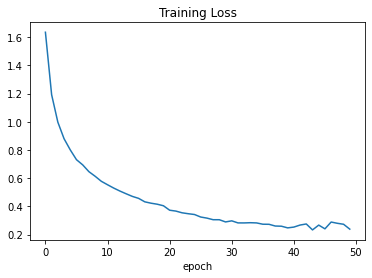

In [25]:
plt.plot(loss_2)
plt.title("Training Loss")
plt.xlabel("epoch")
plt.show()

# 평가하기

In [27]:
correct = 0
total = 0
with torch.no_grad():
    alexnet.eval()

    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = alexnet(images)

        _, pred = torch.max(outputs, 1) # torch.max는 최대값과 최대값의 index를 반환한다.
        
        total += labels.size(0) # 개수 누적(총 개수)
        correct += (pred == labels).sum().item()

print("Test Accuracy : {:.2f}%".format(100*correct/total))

Test Accuracy : 75.09%
